In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
structure_df = pd.read_csv("data/csv_building_structure.csv")

damage_assessment_df = pd.read_csv("data/csv_building_damage_assessment.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_12204\1362159765.py:3: DtypeWarning: Columns (5,17,29,34,35,36,37,38,39,40,41,42,43,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  damage_assessment_df = pd.read_csv("data/csv_building_damage_assessment.csv")


In [27]:
merged_df = pd.merge(structure_df, damage_assessment_df, on="building_id")

merged_df.head(10)

,building_id,district_id_x,vdcmun_id_x,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,120101000061,12,1207,120703,1,1,18,216,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
6,120101000071,12,1207,120703,1,0,13,234,9,0,...,NaN,NaN,0.0,0,0,0,0,0,0,0
7,120101000081,12,1207,120703,1,1,8,280,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,120101000091,12,1207,120703,1,1,22,268,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
9,120101000101,12,1207,120703,1,1,10,268,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Columns: 109 entries, building_id to has_geotechnical_risk_other
dtypes: float64(17), int64(31), object(61)
memory usage: 633.8+ MB


In [ ]:
#checked to see if there are columns that has no values
zero_cols = merged_df.columns[(merged_df == 0).all()]
zero_cols

Index([], dtype='object')

In [18]:
merged_df.columns.tolist()

['building_id',
 'district_id_x',
 'vdcmun_id_x',
 'ward_id_x',
 'count_floors_pre_eq',
 'count_floors_post_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'condition_post_eq',
 'damage_grade_x',
 'technical_solution_proposed_x',
 'district_id_y',
 'vdcmun_id_y',
 'ward_id_y',
 'damage_overall_collapse',
 'damage_overall_leaning',
 'damage_overall_adjacent_building_risk',
 'damage_foundation_severe',
 'damage_foundat

In [34]:
damage_counts = merged_df['damage_grade_x'].value_counts()
damage_df = damage_counts.to_frame()
damage_df.columns = ['Count']

damage_df.head()

,Count
damage_grade_x,
Grade 5,275766
Grade 4,183844
Grade 3,136412
Grade 2,87257
Grade 1,78815


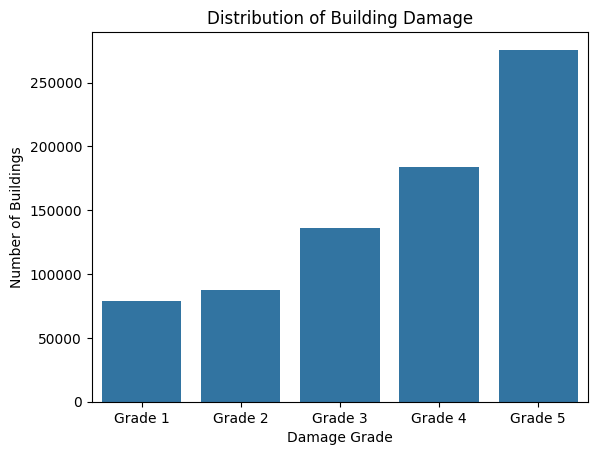

In [ ]:
#plot for damage grade
grade_order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']

sns.countplot(x="damage_grade_x", 
              data=merged_df, 
              order=grade_order)
plt.xlabel("Damage Grade")
plt.ylabel("Number of Buildings")
plt.title("Distribution of Building Damage")
plt.show()

In [31]:
structure_cols = [
    'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
    'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber', 'has_superstructure_bamboo',
    'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered',
    'has_superstructure_other'
]
#.idxmax(axis=1) identifies the column name with the highest value in each row.     
# In a One-Hot Encoded dataset—where columns contain 1s and 0s—this effectively finds 
# the "1" and returns the corresponding material name.
merged_df['primary_material'] = merged_df[structure_cols].idxmax(axis=1)

merged_df['primary_material'] = merged_df['primary_material'].str.replace('has_superstructure_', '')

In [32]:
merged_df.columns

Index(['building_id', 'district_id_x', 'vdcmun_id_x', 'ward_id_x',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       ...
       'has_damage_cladding_glazing', 'has_geotechnical_risk',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_liquefaction', 'has_geotechnical_risk_landslide',
       'has_geotechnical_risk_rock_fall', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_other', 'primary_material'],
      dtype='object', length=110)

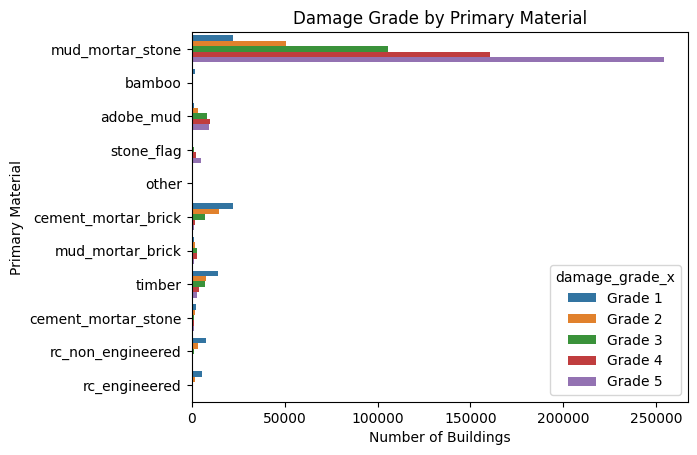

In [ ]:
# plot for damage grade by primary material
sns.countplot(y="primary_material", 
              hue="damage_grade_x", 
              data=merged_df, 
              hue_order=grade_order)
plt.xlabel("Number of Buildings")
plt.ylabel("Primary Material")
plt.title("Damage Grade by Primary Material")
plt.show()

In [ ]:
mud_mortar_df = merged_df[merged_df["primary_material"] == "mud_mortar_stone"]
mud_mortar_df.head()

,building_id,district_id_x,vdcmun_id_x,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other,primary_material
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0.0,0.0,0,0,0,0,0,0,0,mud_mortar_stone
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0.0,0.0,0,0,0,0,0,0,0,mud_mortar_stone
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0.0,0.0,0,0,0,0,0,0,0,mud_mortar_stone
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0.0,0.0,0,0,0,0,0,0,0,mud_mortar_stone
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0.0,0.0,0,0,0,0,0,0,0,mud_mortar_stone


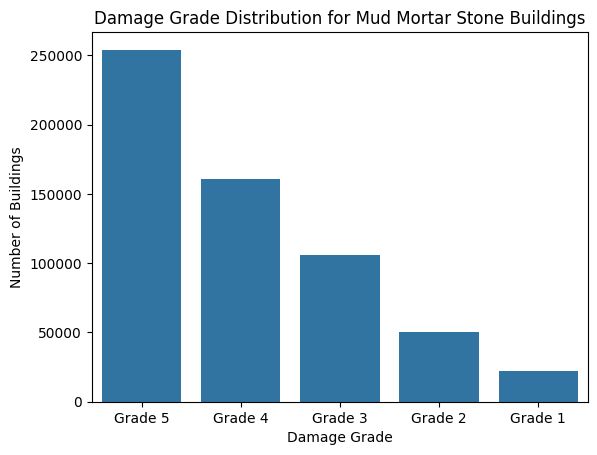

In [ ]:
# plot for mud_mortar_stone only
mmstone_df = merged_df[merged_df["primary_material"] == "mud_mortar_stone"]

sns.countplot(x="damage_grade_x", 
              data=mmstone_df, 
              order=mmstone_df["damage_grade_x"].value_counts().index)
plt.title("Damage Grade Distribution for Mud Mortar Stone Buildings")
plt.xlabel("Damage Grade")
plt.ylabel("Number of Buildings")
plt.show()

In [ ]:
# this filters the dataset so we can focus on 10 districts that have the most buildings
top_districts = merged_df["district_id_x"].value_counts().index[:10]
location_df = merged_df[merged_df["district_id_x"].isin(top_districts)]

In [ ]:
# getting the top 10 districts
top_districts = merged_df["district_id_x"].value_counts().head(10).index

# filtering the main dataframe
location_df = merged_df[merged_df["district_id_x"].isin(top_districts)]

# create the crosstab
# This shows districts as rows and Damage Grades as columns
district_summary = pd.crosstab(
    location_df["district_id_x"], 
    location_df["damage_grade_x"]
).reindex(columns=["Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5"])

district_summary

damage_grade_x,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
district_id_x,,,,,
12,7961,8605,9220,7946,5620
20,13087,14469,17085,15917,8191
21,2116,7151,16945,20910,11490
22,1353,2993,6520,14409,35364
23,1233,2009,3271,10796,71432
24,8330,11726,25130,28974,23859
28,2615,2745,8209,23284,40295
30,4952,7526,15218,26080,35346
31,32540,21135,18525,10928,7866


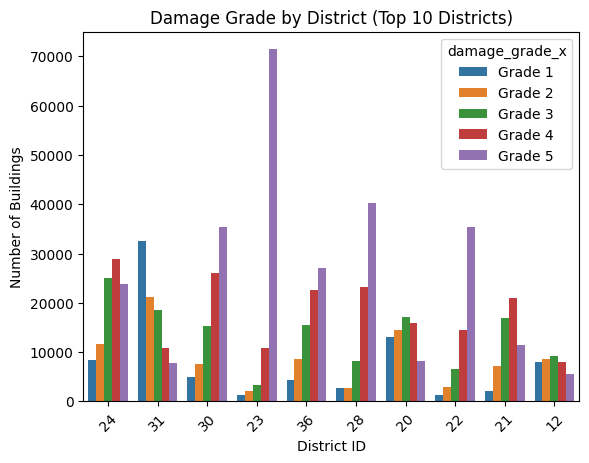

In [60]:
sns.countplot(
    x="district_id_x",
    hue="damage_grade_x",
    data=location_df,
    order=top_districts,
    hue_order = grade_order
)

plt.title("Damage Grade by District (Top 10 Districts)")
plt.xlabel("District ID")
plt.ylabel("Number of Buildings")
plt.xticks(rotation=45)
plt.show()

In [50]:
merged_df["age_building"].describe().round(2)

count    762106.00
mean         24.33
std          65.04
min           0.00
25%           9.00
50%          16.00
75%          27.00
max         999.00
Name: age_building, dtype: float64

In [51]:
merged_df["age_building"].value_counts().head()

age_building
15    49983
20    46525
10    39794
25    37063
12    36458
Name: count, dtype: int64

<Figure size 800x500 with 0 Axes>

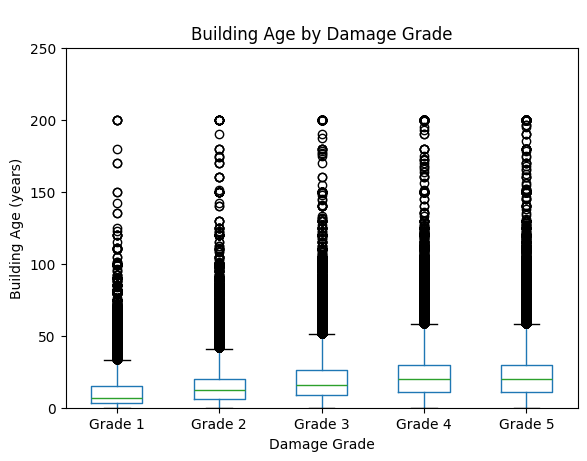

In [52]:
plt.figure(figsize=(8, 5))
merged_df.boxplot(
    column="age_building",
    by="damage_grade_x",
    grid=False
)

plt.ylim(0, 250)
plt.title("Building Age by Damage Grade")
plt.suptitle(" ")  # i added this coz it instantly creates an automatic title
plt.xlabel("Damage Grade")
plt.ylabel("Building Age (years)")
plt.show()

In [ ]:
avg_age_damage = merged_df.groupby("damage_grade_x")["age_building"].mean().round(2)
avg_age_damage.to_frame(name="Average Age")

,Average Age
damage_grade_x,
Grade 1,14.96
Grade 2,19.52
Grade 3,24.83
Grade 4,26.99
Grade 5,26.50


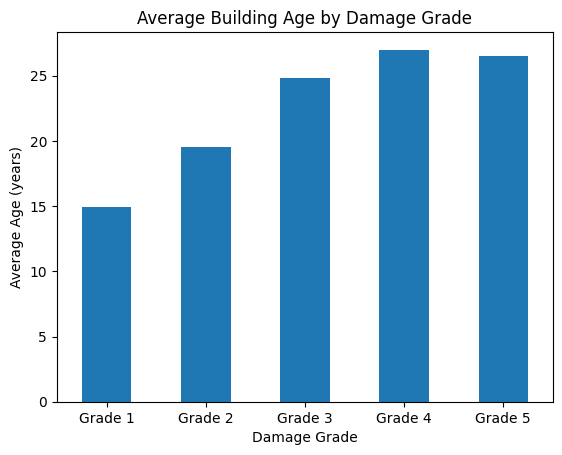

In [59]:
avg_age_damage.plot(kind="bar")
plt.title("Average Building Age by Damage Grade")
plt.xlabel("Damage Grade")
plt.ylabel("Average Age (years)")
plt.xticks(rotation=0)
plt.show()

In [62]:
merged_df['count_floors_pre_eq'].describe().round(2)

count    762106.00
mean          2.09
std           0.66
min           1.00
25%           2.00
50%           2.00
75%           2.00
max           9.00
Name: count_floors_pre_eq, dtype: float64